# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

ERROR: Operation cancelled by user


In [3]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.3
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.6.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
beautifulsoup4                   4.12.3


In [4]:
import tensorflow as tf
import os

In [5]:
! gdown  --id 1H1UH1UOqzxg2THk9r1uDz2ublRyaEWkR

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1H1UH1UOqzxg2THk9r1uDz2ublRyaEWkR
From (redirected): https://drive.google.com/uc?id=1H1UH1UOqzxg2THk9r1uDz2ublRyaEWkR&confirm=t&uuid=8a873e9a-28a5-4c3f-ab23-a7bf28cedd7e
To: /content/vege.zip
100% 560M/560M [00:07<00:00, 70.5MB/s]


In [6]:
!unzip /content/vege.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/Vegetable Images/train/Radish/0001.jpg  
  inflating: /content/Vegetable Images/train/Radish/0002.jpg  
  inflating: /content/Vegetable Images/train/Radish/0003.jpg  
  inflating: /content/Vegetable Images/train/Radish/0004.jpg  
  inflating: /content/Vegetable Images/train/Radish/0005.jpg  
  inflating: /content/Vegetable Images/train/Radish/0006.jpg  
  inflating: /content/Vegetable Images/train/Radish/0007.jpg  
  inflating: /content/Vegetable Images/train/Radish/0008.jpg  
  inflating: /content/Vegetable Images/train/Radish/0009.jpg  
  inflating: /content/Vegetable Images/train/Radish/0010.jpg  
  inflating: /content/Vegetable Images/train/Radish/0011.jpg  
  inflating: /content/Vegetable Images/train/Radish/0012.jpg  
  inflating: /content/Vegetable Images/train/Radish/0013.jpg  
  inflating: /content/Vegetable Images/train/Radish/0014.jpg  
  inflating: /content/Vegetable Images/train/Radish/0015.jpg  
  in

In [7]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [8]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# 2. Remove dodgy images

In [9]:
import cv2
import imghdr

In [10]:
data_dir = "/content/Vegetable Images/train"

In [11]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [12]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [13]:
import numpy as np
from matplotlib import pyplot as plt
import keras

In [14]:
data = tf.keras.utils.image_dataset_from_directory("/content/Vegetable Images/train")

Found 15000 files belonging to 15 classes.


In [15]:
data_iterator = data.as_numpy_iterator()

In [16]:
batch = data_iterator.next()

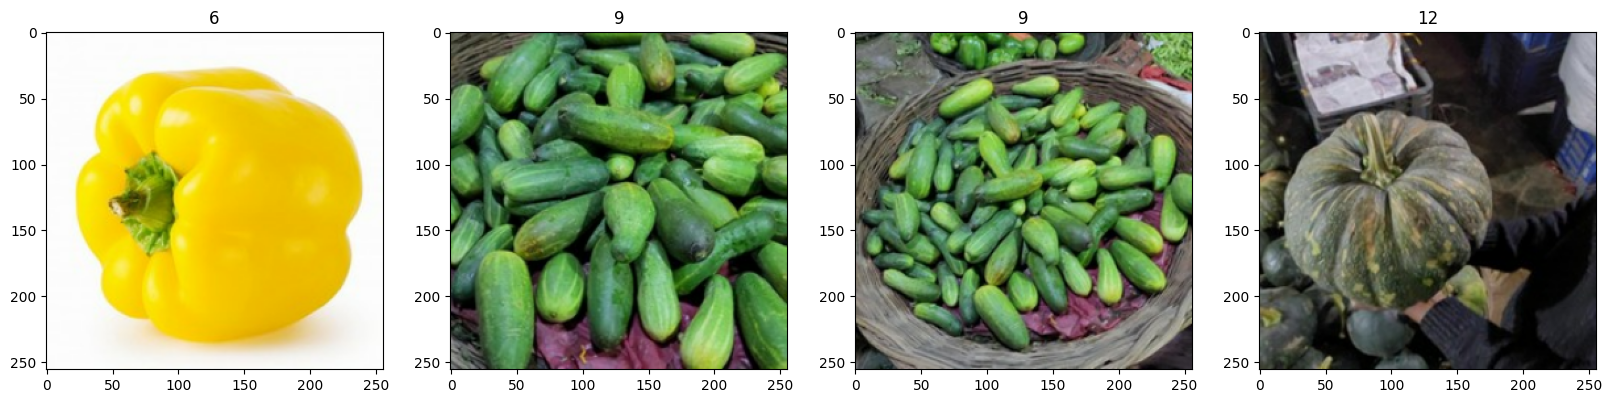

In [17]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [18]:
data = data.map(lambda x,y: (x/255, y))

In [19]:
data.as_numpy_iterator().next()

(array([[[[0.1882353 , 0.16470589, 0.17254902],
          [0.19142157, 0.16789216, 0.16936274],
          [0.21642157, 0.19828431, 0.19558823],
          ...,
          [0.75661767, 0.79313725, 0.83210784],
          [0.76985294, 0.8090686 , 0.85612744],
          [0.7921569 , 0.83137256, 0.8784314 ]],
 
         [[0.17230392, 0.1487745 , 0.1502451 ],
          [0.19361213, 0.17267157, 0.16518076],
          [0.23374693, 0.2166054 , 0.20654105],
          ...,
          [0.7829044 , 0.82161456, 0.86277574],
          [0.8060968 , 0.8453125 , 0.8923713 ],
          [0.8335784 , 0.8727941 , 0.9198529 ]],
 
         [[0.16053921, 0.14509805, 0.12622549],
          [0.20136335, 0.18691789, 0.16505821],
          [0.25409007, 0.23700981, 0.22002144],
          ...,
          [0.80902267, 0.85363054, 0.90068936],
          [0.82372856, 0.8683364 , 0.9207874 ],
          [0.84583336, 0.8904412 , 0.94289213]],
 
         ...,
 
         [[0.61715686, 0.63259804, 0.6877451 ],
          [0.63627

# 5. Split Data

In [20]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [21]:
train_size

328

In [22]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [23]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [25]:
model = Sequential()

In [26]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(16, (3,3), strides=1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), strides=1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), strides=1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
# Adding a dropout layer with a dropout rate of 0.5
model.add(Dropout(0.5))
model.add(Dense(15, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)       

# 7. Train

In [28]:
logdir='logs'

In [29]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [30]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
328/328 [==============================] - 44s 113ms/step - loss: 1.5616 - accuracy: 0.4849 - val_loss: 0.8809 - val_accuracy: 0.7450
Epoch 2/20
328/328 [==============================] - 38s 115ms/step - loss: 0.7778 - accuracy: 0.7487 - val_loss: 0.5221 - val_accuracy: 0.8370
Epoch 3/20
328/328 [==============================] - 38s 117ms/step - loss: 0.4891 - accuracy: 0.8437 - val_loss: 0.4787 - val_accuracy: 0.8636
Epoch 4/20
328/328 [==============================] - 37s 113ms/step - loss: 0.3316 - accuracy: 0.8950 - val_loss: 0.3215 - val_accuracy: 0.9062
Epoch 5/20
328/328 [==============================] - 30s 91ms/step - loss: 0.2411 - accuracy: 0.9242 - val_loss: 0.3082 - val_accuracy: 0.9113
Epoch 6/20
328/328 [==============================] - 29s 88ms/step - loss: 0.1773 - accuracy: 0.9439 - val_loss: 0.3182 - val_accuracy: 0.9099
Epoch 7/20
328/328 [==============================] - 30s 91ms/step - loss: 0.1880 - accuracy: 0.9419 - val_loss: 0.2747 - val_accur

# 8. Plot Performance

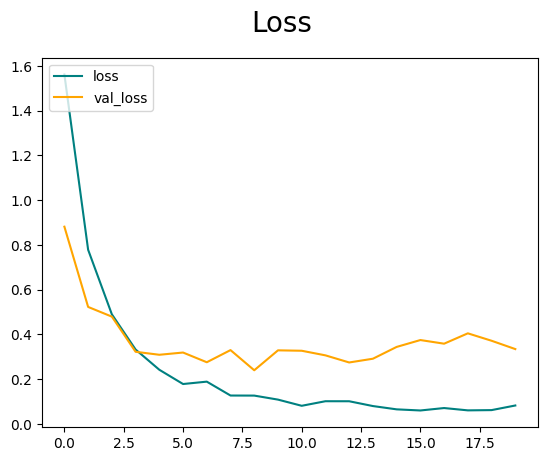

In [31]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

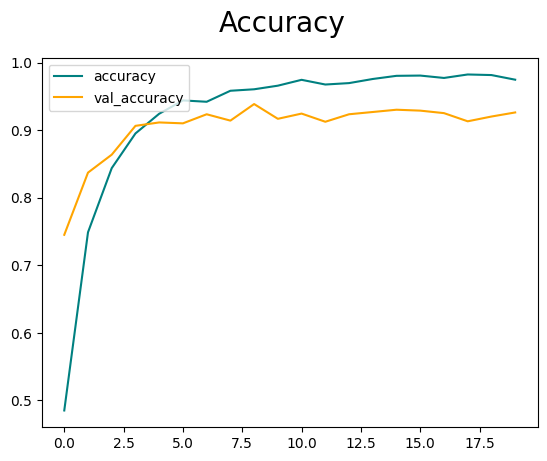

In [32]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [33]:
import cv2

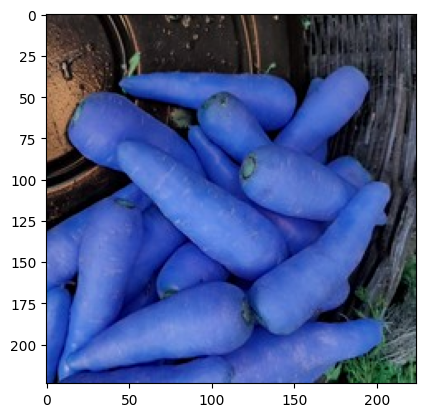

In [47]:
img = cv2.imread('/content/Vegetable Images/test/Carrot/1001.jpg', cv2.IMREAD_COLOR)
plt.imshow(img)
plt.show()

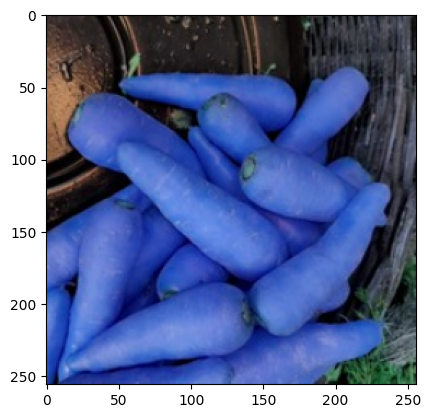

In [48]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [49]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 19ms/step


In [50]:
yhat
predicted_classes = np.argmax(yhat, axis=1)
print(predicted_classes)

[11]


In [52]:
import os
from PIL import Image
import keras
import numpy

print("Prediction result:")
dir = "/content/Vegetable Images/test"
files = os.listdir(dir)
correct = 0
total = 0
#dictionary to label all signs class.
classes = {0: 'Bean', 1: 'Bitter_Gourd', 2: 'Bottle_Gourd', 3: 'Brinjal', 4: 'Broccoli', 5: 'Cabbage', 6: 'Capsicum', 7: 'Carrot', 8: 'Cauliflower', 9: 'Cucumber', 10: 'Papaya', 11: 'Potato', 12: 'Pumpkin', 13: 'Radish', 14: 'Tomato'}


for file_name in files:
  images_paths = os.listdir(dir + "/" + file_name)
  for image_name in images_paths:
      total += 1
      image = Image.open(dir + "/" + file_name + "/" + image_name).convert('RGB')
      print(image)
      image = image.resize((256,256))
      image = numpy.expand_dims(image, axis=0)
      image = numpy.array(image)
      image = image/255
      predictions = model.predict(image)  # x_test is your input data
      print(predictions)
      predicted_classes = np.argmax(predictions, axis=1)
      print(predicted_classes)
      sign = classes[predicted_classes[0]]
      vegetables_list = ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']
      for vegetable in vegetables_list:
          if vegetable in file_name and vegetable in sign:
              print(f"{correct}. {file_name} {sign}")
              correct += 1
print("accuracy: ", (correct/total))

Streaming output truncated to the last 5000 lines.
[[9.7399865e-14 1.2199147e-13 1.6551424e-15 5.4730871e-14 5.4754268e-10
  1.4337201e-07 3.9708267e-16 5.0109504e-15 9.9999988e-01 3.8385737e-14
  6.4779509e-15 4.1849241e-10 1.6277805e-10 1.0190846e-09 6.7050957e-12]]
[8]
2088. Cauliflower Cauliflower
<PIL.Image.Image image mode=RGB size=224x224 at 0x7F5760D64DC0>
1/1 [==============================] - 0s 26ms/step
[[3.5396022e-13 4.2507760e-15 5.0296665e-13 2.5127283e-12 4.5192894e-10
  5.9361275e-12 3.0687218e-16 1.0063032e-14 1.0000000e+00 1.4485631e-13
  8.1839646e-15 1.0747079e-10 4.2205177e-09 2.8488905e-09 5.9481727e-13]]
[8]
2089. Cauliflower Cauliflower
<PIL.Image.Image image mode=RGB size=224x224 at 0x7F576C730DC0>
1/1 [==============================] - 0s 26ms/step
[[3.41784090e-09 2.04716250e-17 6.22464569e-22 3.17612317e-14
  8.38274082e-06 5.80633408e-04 1.28854965e-19 9.29076410e-31
  9.99410987e-01 1.07253461e-15 2.16693553e-22 2.12601074e-16
  2.10630430e-10 1.45343034

# 11. Save the Model

In [ ]:
from tensorflow.keras.models import load_model

In [53]:
model.save('/content/imageclassifier.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
